In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from Python.pandas.feature_selection import *

In [4]:
data = pd.read_csv("./data/training2.csv", sep=';', index_col='id')
print("data.shape(): ", data.shape)
print("data.columns:", data.columns)
data.describe()

data.shape():  (41188, 21)
data.columns: Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,1.570960,0.578840,4.628198,1.734447,72.251528
min,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,1.400000,94.767000,-26.900000,5.045000,5228.100000


age  has [ 81 ] different values, please create features yourself!
please notice here are some seldom_indexes:  Index(['64', '20', '62', '71', '66', '63', '65', '70', '19', '68', '72', '69',
       '73', '74', '78', '67', '18', '80', '76', '75', '81', '77', '82', '88',
       '83', '85', '79', '84', '86', '17', '92', '89', '91', '98', '94', '95',
       '87'],
      dtype='object')



job  has [ 14 ] different values, please create features yourself!
please notice here are some seldom_indexes:  Index([], dtype='object')



married     18811
single       8751
divorced     3447
-            2614
.            1869
?            1466
Name: marital, dtype: int64
use following code to generate features from label mapping:
marital_mapping = {'married': 0, 'single': 1, 'divorced': 2, '-': 3, '.': 4, '?': 5}
#TODO: add your logic to handle None
data_marital = one_hot_encoder_column(data, 'marital', marital_mapping, fill_na=99)



university.degree      9091
high.school            7191
basic.9y  

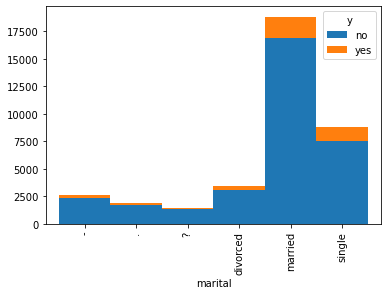

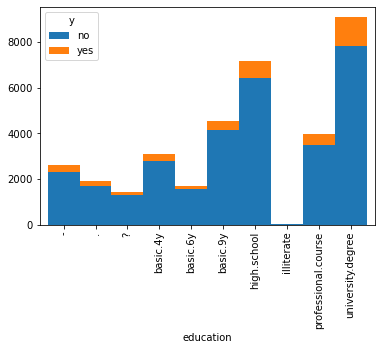

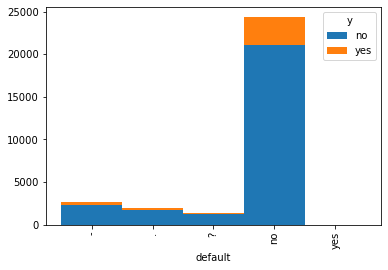

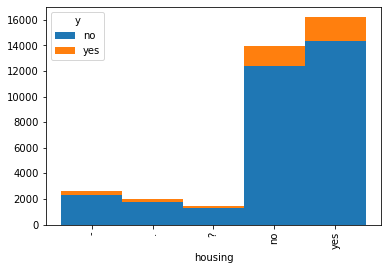

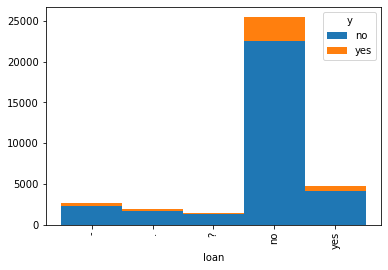

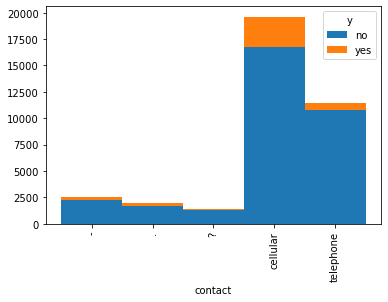

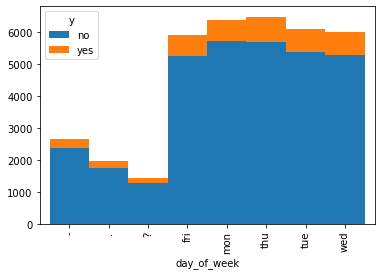

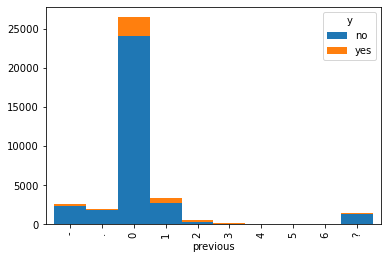

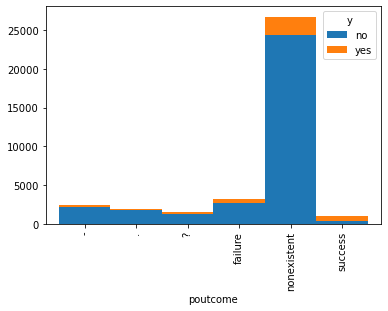

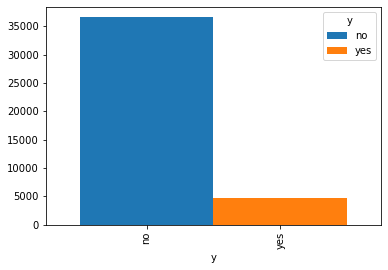

In [13]:
object_feature_helper(data)

<AxesSubplot:>

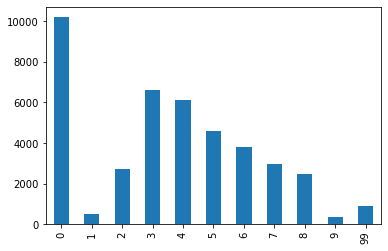

In [5]:
data_age = data['age'].apply(lambda age: age_to_int(age))
data_age.value_counts().sort_index().plot(kind='bar')

In [6]:
job_mapping = {'admin.': 0, 'blue-collar': 1, 'technician': 2, 'services': 3, '-': 99, 'management': 0, '.': 99,
               '?': 99, 'retired': 11, 'entrepreneur': 0, 'self-employed': 10, 'unemployed': 11, 'housemaid': 10,
               'student': 11}
data_job, job_ohe = one_hot_encoder_column(data, 'job', job_mapping, fill_na=99)

,job_0,job_1,job_2,job_3,job_4,job_5
id,,,,,,
1,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
41184,0.0,0.0,0.0,0.0,1.0,0.0
41185,1.0,0.0,0.0,0.0,0.0,0.0
41186,0.0,0.0,0.0,0.0,1.0,0.0


<AxesSubplot:>

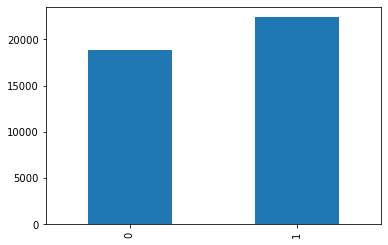

In [7]:
marital_mapping = {'married': 0, 'single': 1, 'divorced': 1, '-': 1, '.': 1, '?': 1}
data_marital = data['marital'].apply(lambda marital: 0 if marital == 'married' else 1)

data_marital.value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

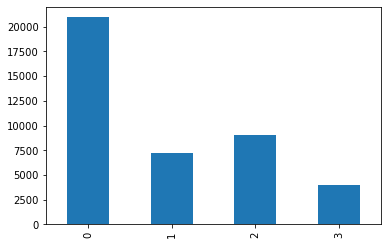

In [8]:
education_mapping = {'university.degree': 2, 'high.school': 1, 'basic.9y': 0, 'professional.course': 3, 'basic.4y': 0, '-': 0, '.': 0, 'basic.6y': 0, '?': 0, 'illiterate': 0, 0: 0}
data['education'] = data['education'].fillna(0)
data_education = data['education'].apply(lambda edu: education_mapping[edu])
data_education.value_counts().sort_index().plot(kind='bar')


In [9]:
housing_mapping = {'yes': 0, 'no': 1, '-': 0, '.': 0, '?': 0, 0:0}
data_housing, housing_ohe = one_hot_encoder_column(data, 'housing', housing_mapping, fill_na=99)
data_housing = pd.DataFrame(data_housing)

In [10]:
contact_mapping = {'cellular': 0, 'telephone': 1, '-': 2, '.': 2, '?': 2}
data_contact, contact_ohe = one_hot_encoder_column(data, 'contact', contact_mapping, fill_na=99)
data_contact = pd.DataFrame(data_contact)

In [11]:
day_of_week_mapping = {'thu': 0, 'mon': 1, 'tue': 2, 'wed': 3, 'fri': 4, '-': 5, '.': 5, '?': 5}
data_day_of_week, day_of_week_mapping_ohe = one_hot_encoder_column(data, 'day_of_week', day_of_week_mapping, fill_na=99)
data_day_of_week = pd.DataFrame(data_day_of_week)

In [12]:
data_duration = data['duration'].fillna(0)
data_duration[data_duration == '-'] = '0'
data_duration[data_duration == '.'] = '0'
data_duration[data_duration == '?'] = '0'
data_duration = data_duration.astype(int)

In [13]:
data['campaign'].value_counts()
data_campaign = data['campaign'].fillna(0)
data_campaign[data_campaign == '-'] = '0'
data_campaign[data_campaign == '.'] = '0'
data_campaign[data_campaign == '?'] = '0'
data_campaign = data_campaign.astype(int)

In [14]:
data['pdays'].value_counts()
non_values = ['-', '.', '?']
data_pdays = data['pdays'].fillna(999)
data_pdays[data_pdays.isin(non_values)] = 999
data_pdays = data_pdays.astype(int)
data_pdays.value_counts()

999    40091
3        324
6        301
4         82
2         50
7         47
9         40
12        37
10        35
5         31
13        27
1         23
11        19
15        19
8         14
14        14
0          9
16         7
18         7
17         3
19         3
22         2
20         1
26         1
27         1
Name: pdays, dtype: int64

In [15]:
data_previous = fill_na(data['previous'], non_list=non_values, na_value=0)
data_previous.value_counts()

0    36979
1     3421
2      535
3      180
4       56
5       13
6        4
Name: previous, dtype: int64

In [16]:
poutcome_mapping = {'nonexistent': 0, 'failure': 1, '-': 0, '.': 0, '?': 0, 'success': 2}
data_poutcome, poutcome_ohe = one_hot_encoder_column(data, 'poutcome', poutcome_mapping, fill_na=0)
data_poutcome = pd.DataFrame(data_poutcome)

data_poutcome

,poutcome_0,poutcome_1
id,,
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
...,...,...
41184,0.0,0.0
41185,0.0,0.0
41186,0.0,0.0


In [17]:
from sklearn.preprocessing import StandardScaler
data_emp_var_rate = data['emp.var.rate']
data_cons_price_idx = data['cons.price.idx']
data_cons_conf_idx = data['cons.conf.idx']
data_euribor3m = data['euribor3m']
data_nr_employed = data['nr.employed']

In [21]:
data_y = data['y'].apply(lambda y: 1 if y=='yes' else 0)

In [22]:
data_all = pd.concat([data_age, data_job, data_marital, data_education, data_housing, data_contact, data_day_of_week,
                      data_duration, data_campaign, data_pdays, data_previous, data_poutcome, data_y], axis=1)

data_all.to_csv("./data/features2_all.csv")